# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [83]:
from commonfunctions import *
import math


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
'''
(1) Averaging Filter
'''
from skimage.filters import gaussian

In [129]:
'''
(2) Median Filter
'''
def custom_median(image,filtersize):
    edgex = filtersize // 2;
    edgey = filtersize // 2;
    finalout = (image *255).astype(np.uint8)
    tempimage = np.copy(finalout)

    for i in range(edgex,len(tempimage)-edgex):
        for j in range(edgey,len(tempimage[0])-edgey):
            temparray = tempimage[i-edgex:i+filtersize-edgex,j-edgey:j+filtersize-edgey]
            flattemp=temparray.flatten()
            flattemp.sort()
            finalout[i][j] = flattemp[len(flattemp)//2]
    return finalout
            

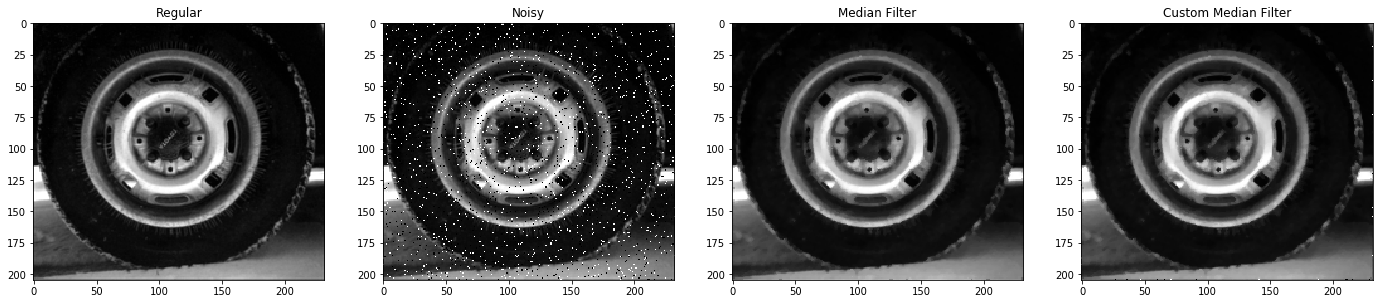

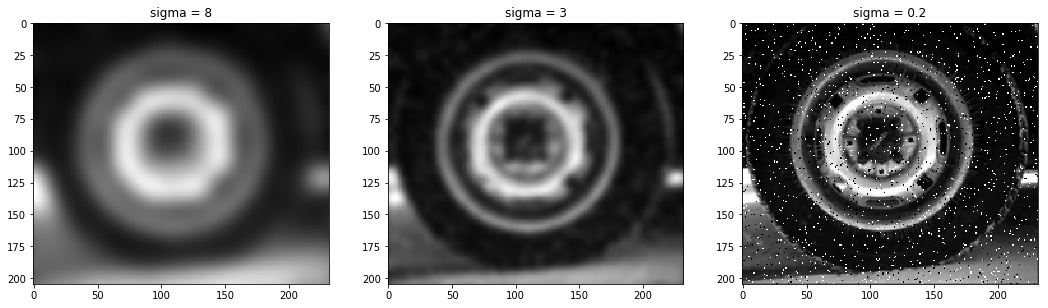

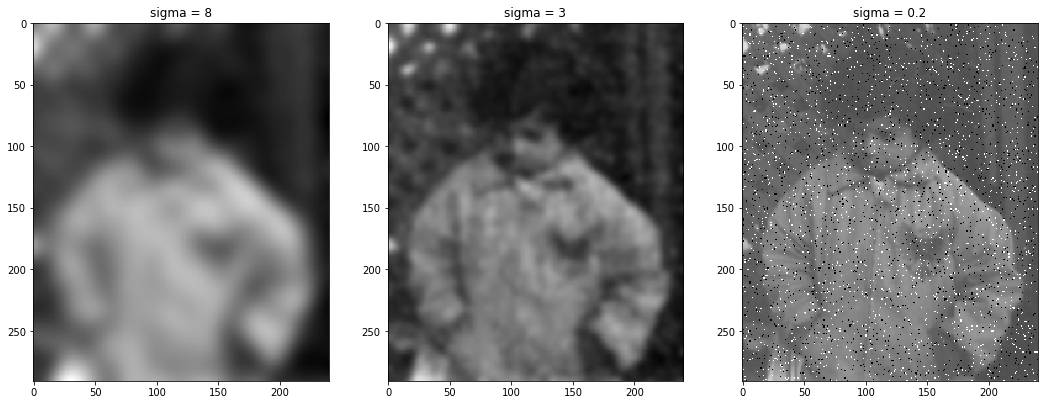

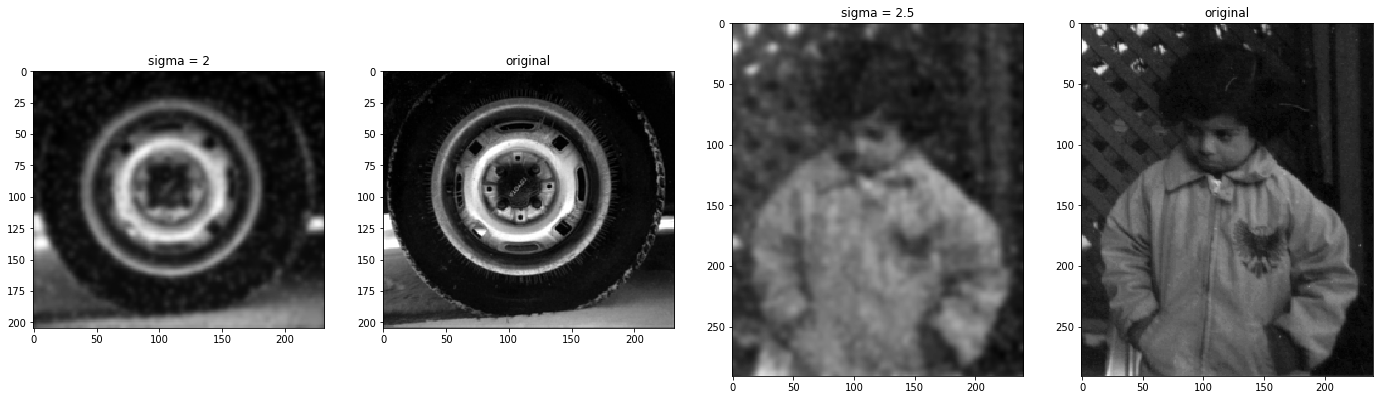

In [130]:
image1 = io.imread("tire.tif")
greyimg1 = rgb2gray(image1)
#applying noise to image
noisy1 = random_noise(greyimg1, mode='s&p', amount = 0.05)

#Filtering using built in function median
filtered1 = median(noisy1) 
custom_filter1 = custom_median(noisy1,3)



names= ["Regular","Noisy","Median Filter", "Custom Median Filter"]

array = []
array.append(greyimg1)
array.append(noisy1)
array.append(filtered1)
array.append(custom_filter1)

show_images(array,names)

#Filtering using gaussian filter
sigmas = ["sigma = 8","sigma = 3","sigma = 0.2"]

gaus11 = gaussian(noisy1,8)
gaus12 = gaussian(noisy1,3)
gaus13 = gaussian(noisy1,0.2)

array3 = []


array3.append(gaus11)
array3.append(gaus12)
array3.append(gaus13)

show_images(array3,sigmas)


#Filtering using gaussian filter
gaus21 = gaussian(noisy2,8)
gaus22 = gaussian(noisy2,3)
gaus23 = gaussian(noisy2,0.2)

array4 = []

array4.append(gaus21)
array4.append(gaus22)
array4.append(gaus23)

show_images(array4,sigmas)

#Best values
#Sigma means the effect of the nearby pixels on the averaging and the length means the size of the kernel
names = ["sigma = 2","original","sigma = 2.5","original"]
gaus31 = gaussian(noisy1,2)
gaus32 = gaussian(noisy2,2.5)
array5 = []
array5.append(gaus31)
array5.append(image1)
array5.append(gaus32)
array5.append(image2)
show_images(array5,names)